#**Fashion MNIST**
A dataset of Zalando's article images with training set of 60,000 examples and a test set of 10,000 examples. 

---
**Dataset Information:**<br>
Each sample is a 28x28, 784 pixels grayscale image, associated with a label from 10 classes/labels.<br>
    0 : T-shirt/top <br>
    1 : Trouser <br>
    2 : Pullover <br>
    3 : Dress <br>
    4 : Coat <br>
    5 : Sandal <br>
    6 : Shirt <br>
    7 : Sneaker <br>
    8 : Bag <br>
    9 : Ankle boot <br>

Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

Each row is a separate image and Column 1 is the class label. Remaining columns are pixel numbers (784 total). Each value is the darkness of the pixel (1 to 255)

Dataset is obtained from: https://www.kaggle.com/zalando-research/fashionmnist

---
Note: Data augmentation may be applied.

#**Step 1: Import Libraries**

In [96]:
import pandas as pd
import tensorflow as tf
import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
from IPython.display import Image, display

#**Step 2: Read dataset**

In [2]:
fashion_train = pd.read_csv('/content/fashion-mnist_train.csv')
fashion_test = pd.read_csv('/content/fashion-mnist_test.csv')
print(fashion_train.head())
print(fashion_test.head())

   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         

#**Step 3: Image Normalization**

In [3]:
fashion_img_train = fashion_train.iloc[:, 1:]
fashion_label_train = fashion_train.iloc[:, 0]
fashion_img_test = fashion_test.iloc[:, 1:]
fashion_label_test = fashion_test.iloc[:, 0]

fashion_img_train = fashion_img_train.apply(lambda x: np.array(tuple(x/255.)).reshape(28,28), axis=1)
fashion_img_test = fashion_img_test.apply(lambda x: np.array(tuple(x/255.)).reshape(28,28), axis=1)

fashion_target_name = {0: 'T-shirt/Top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
                       5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

#**Step 4: Image Visualization**

In [4]:
def display_image(dataframe_train, dataframe_label):
    fig, axes = plt.subplots(5, 5, figsize=(10, 10))
    fig.tight_layout(pad=1)
    for i in range(5):
        for j in range(5):
            idx = np.random.randint(0, dataframe_train.shape[0]-1)
            axes[i, j].imshow(dataframe_train[idx], cmap='gray')
            axes[i, j].set_title(fashion_target_name[dataframe_label[idx]])
            axes[i, j].axis('off')
    plt.show()

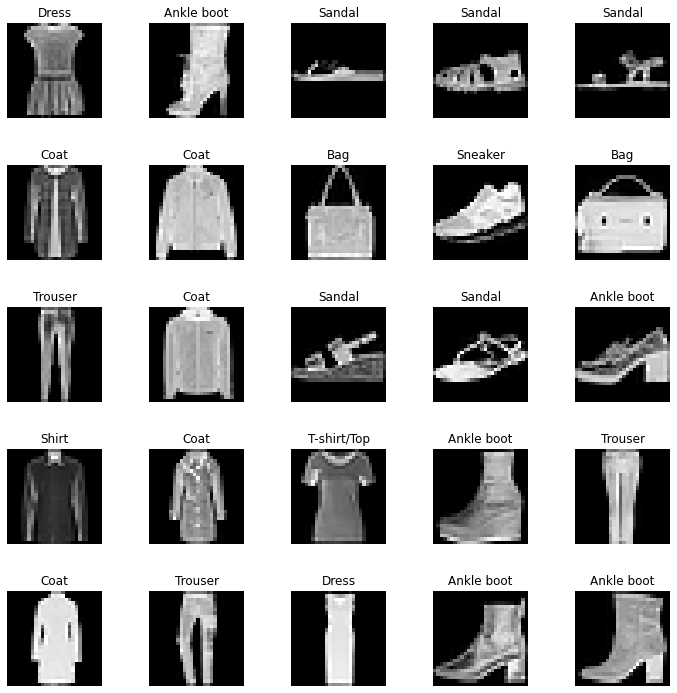

In [5]:
display_image(fashion_img_train, fashion_label_train)

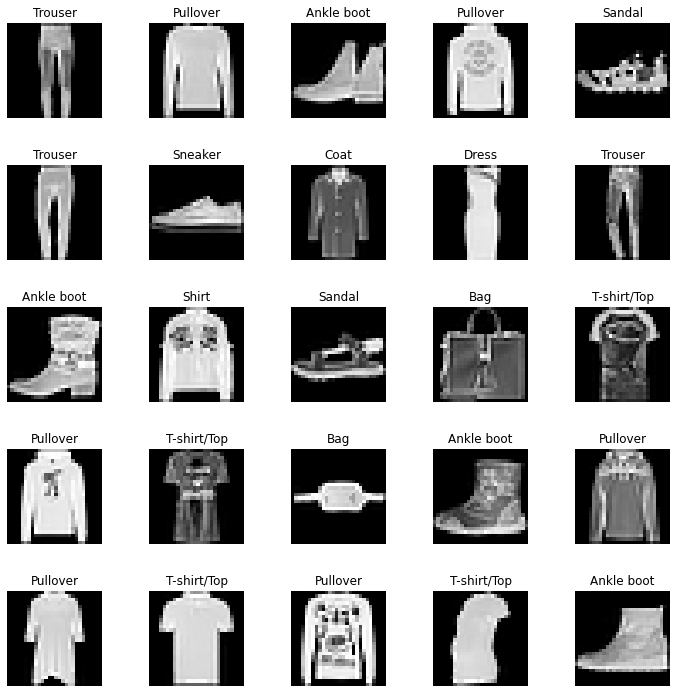

In [6]:
display_image(fashion_img_test, fashion_label_test)

#**Step 5: Model Creation**

In [7]:
input_layer = layers.Input(shape=(28, 28, 1), name='input layer')
conv_layer_1 = layers.Conv2D(filters=64, kernel_size=5, strides=2, padding='same', 
                             kernel_initializer='he_normal', name='conv_layer_1')(input_layer)
pool_layer_1 = layers.MaxPool2D(padding='same', name='maxpool_layer_1')(conv_layer_1)

dropout_1 = layers.Dropout(0.5, name='dropout_1')(pool_layer_1)

conv_layer_2 = layers.Conv2D(filters=64, kernel_size=5, strides=1, padding='same', 
                             kernel_initializer='he_normal', name='conv_layer_2')(dropout_1)
pool_layer_2 = layers.MaxPool2D(padding='same', name='maxpool_layer_2')(conv_layer_2)

dropout_2 = layers.Dropout(0.5, name='dropout_2')(pool_layer_2)

flatten = layers.Flatten(name='flatten')(dropout_2)
dense_layer_1 = layers.Dense(1024, activation='relu', name='dense_layer_1')(flatten)
output = layers.Dense(10, name='output_layer')(dense_layer_1)
model = Model(inputs=input_layer, outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input layer (InputLayer)    [(None, 28, 28, 1)]       0         
                                                                 
 conv_layer_1 (Conv2D)       (None, 14, 14, 64)        1664      
                                                                 
 maxpool_layer_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0         
                                                                 
 conv_layer_2 (Conv2D)       (None, 7, 7, 64)          102464    
                                                                 
 maxpool_layer_2 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                         

#**Step 6: Data Preparation**

In [8]:
fashion_img_train = fashion_img_train.to_frame(name='image')
fashion_img_train = fashion_img_train['image']
fashion_img_train = np.stack(fashion_img_train, axis=0)
fashion_img_train = fashion_img_train.reshape(60000, 28, 28, 1)

fashion_img_test = fashion_img_test.to_frame(name='image')
fashion_img_test = fashion_img_test['image']
fashion_img_test = np.stack(fashion_img_test, axis=0)
fashion_img_test = fashion_img_test.reshape(10000, 28, 28, 1)

In [9]:
fashion_label_train = fashion_label_train.to_numpy()
fashion_label_test = fashion_label_test.to_numpy()

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_dev, Y_train, Y_dev = train_test_split(fashion_img_train, fashion_label_train, test_size=0.05, random_state=42)
X_test = fashion_img_test
Y_test = fashion_label_test

In [12]:
def print_shape(information):
    print('Shape:', information.shape)

def print_type(information):
    print('Type:',type(information))

print_shape(X_train)
print_shape(X_dev)
print_shape(X_test)

print_type(X_train)
print_type(X_dev)
print_type(X_test)

print_shape(Y_train)
print_shape(Y_dev)
print_shape(Y_test)

print_type(Y_train)
print_type(Y_dev)
print_type(Y_test)

Shape: (57000, 28, 28, 1)
Shape: (3000, 28, 28, 1)
Shape: (10000, 28, 28, 1)
Type: <class 'numpy.ndarray'>
Type: <class 'numpy.ndarray'>
Type: <class 'numpy.ndarray'>
Shape: (57000,)
Shape: (3000,)
Shape: (10000,)
Type: <class 'numpy.ndarray'>
Type: <class 'numpy.ndarray'>
Type: <class 'numpy.ndarray'>


#**Step 7: Model Training & Evaluation**

In [13]:
epochs = 20
batch_size = 64

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, name='adam_optimizer')
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

checkpoint_filepath = "/content/fashion_mnist_checkpoints/chckpt.ckpt"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_filepath, monitor="val_loss", mode='min', 
                                                        save_best_only=True, save_weights_only=True)

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, callbacks=[checkpoint_callback], validation_data=(X_dev, Y_dev))


Epoch 1/20
891/891 [==============================] - 116s 129ms/step - loss: 0.5979 - accuracy: 0.7840 - val_loss: 0.3669 - val_accuracy: 0.8597
Epoch 2/20
891/891 [==============================] - 96s 108ms/step - loss: 0.4158 - accuracy: 0.8459 - val_loss: 0.3368 - val_accuracy: 0.8703
Epoch 3/20
891/891 [==============================] - 100s 112ms/step - loss: 0.3739 - accuracy: 0.8628 - val_loss: 0.2826 - val_accuracy: 0.8870
Epoch 4/20
891/891 [==============================] - 94s 106ms/step - loss: 0.3505 - accuracy: 0.8688 - val_loss: 0.2820 - val_accuracy: 0.8890
Epoch 5/20
891/891 [==============================] - 94s 105ms/step - loss: 0.3347 - accuracy: 0.8753 - val_loss: 0.2673 - val_accuracy: 0.8983
Epoch 6/20
891/891 [==============================] - 92s 104ms/step - loss: 0.3252 - accuracy: 0.8802 - val_loss: 0.2686 - val_accuracy: 0.8997
Epoch 7/20
891/891 [==============================] - 91s 102ms/step - loss: 0.3146 - accuracy: 0.8834 - val_loss: 0.2570 - val_

In [16]:
checkpoint_filepath = "/content/fashion_mnist_checkpoints/chckpt.ckpt"
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, name='adam_optimizer')
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
model.load_weights(checkpoint_filepath)
_, accuracy = model.evaluate(fashion_img_test, fashion_label_test)
print(f"Test accuracy: {round(accuracy * 100, 3)}%")

313/313 [==============================] - 4s 13ms/step - loss: 0.2431 - accuracy: 0.9126
Test accuracy: 91.26%


In [17]:
last_conv_layer_name = 'conv_layer_2'

# gradcam
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # 1: create a model that maps input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # 2: Compute the gradient of the top predicted class for input image
    # wrt the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # 3: It is the gradient of the output neuron (top predicted or chosen)
    # wgt the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # 4: It is the vector where each entry is the mean gradient intensity 
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # 5: Multiply each channel in the feature map array
    # by the importance of the channel wrt the top predicted class
    # before summing all channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # 6: Normalize the heatmap (0 - 1) before visualization
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

#**Step 8: GradCam**

##**Example 1:**

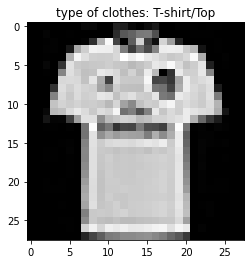

In [18]:
plt.imshow(fashion_img_test[0,:,:,0], cmap='gray')
plt.title('type of clothes: {}'.format(fashion_target_name[fashion_label_test[0]]))
plt.show()

Predicted: [  7.775524   -14.916242     0.45208487  -1.666713    -2.1443126
 -13.385018     4.3028145  -10.231242    -4.7244263  -11.211     ]


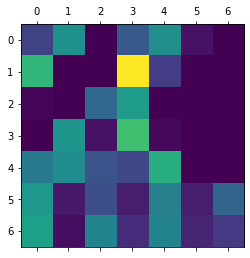

In [19]:
# taking array idx 0 from fashion_img_test 
img_array = np.expand_dims(fashion_img_test[0], axis=0)

# print the top predicted class
predictions = model.predict(fashion_img_test)[0]
print("Predicted:", predictions)

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

In [60]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.8):
    # image array
    img = img_path

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    print(heatmap.shape)
    print(jet_colors.shape)
    print(jet_heatmap.shape)

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    print(jet_heatmap.shape)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path, width=200, height=200))

save_and_display_gradcam(np.squeeze(img_array, axis=0), heatmap)

(7, 7)
(256, 3)
(7, 7, 3)
(28, 28, 3)


##**Example 2:**

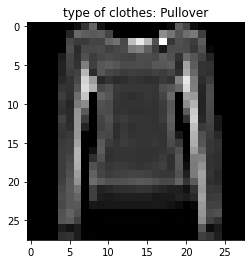

In [63]:
plt.imshow(fashion_img_test[2,:,:,0], cmap='gray')
plt.title('type of clothes: {}'.format(fashion_target_name[fashion_label_test[2]]))
plt.show()

Predicted: [ 0.6743845  -9.113463    4.983217   -1.7198691   0.47772056 -7.4732823
  2.4555357  -5.8702707  -5.844731   -8.909399  ]


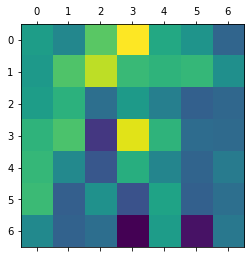

In [64]:
# taking array idx 2 from fashion_img_test 
img_array = np.expand_dims(fashion_img_test[2], axis=0)

# print the top predicted class
predictions = model.predict(fashion_img_test)[2]
print("Predicted:", predictions)

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

In [65]:
save_and_display_gradcam(np.squeeze(img_array, axis=0), heatmap)

(7, 7)
(256, 3)
(7, 7, 3)
(28, 28, 3)


#**Step 9: Visualize model accuracy and loss**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


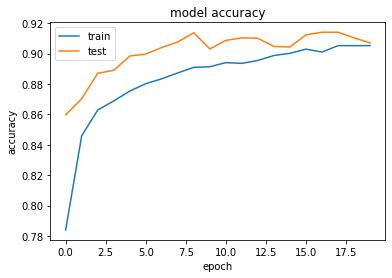

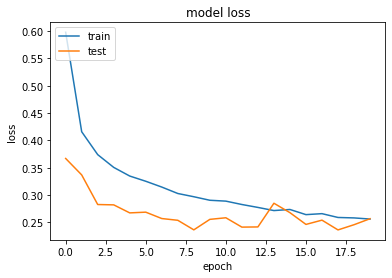

In [71]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#**Step 10: Classification Report**

In [77]:
predict_classes = np.argmax(model.predict(X_test), axis=-1)

In [83]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, predict_classes, target_names=list(fashion_target_name.values())))

              precision    recall  f1-score   support

 T-shirt/Top       0.86      0.86      0.86      1000
     Trouser       0.98      0.99      0.98      1000
    Pullover       0.90      0.84      0.87      1000
       Dress       0.92      0.93      0.92      1000
        Coat       0.86      0.88      0.87      1000
      Sandal       1.00      0.95      0.97      1000
       Shirt       0.76      0.77      0.76      1000
     Sneaker       0.94      0.95      0.94      1000
         Bag       0.99      0.98      0.99      1000
  Ankle boot       0.93      0.98      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



#**Step 11: Visualize Prediction**

In [94]:
def display_result(test_img, y_true, y_predict):
    fig, axes = plt.subplots(5, 5, figsize=(10, 10))
    fig.tight_layout(pad=1)
    for i in range(5):
        for j in range(5):
            idx = np.random.randint(0, test_img.shape[0]-1)
            axes[i, j].imshow(test_img[idx, :, :, 0], cmap='gray')
            axes[i, j].set_title('GT: {}; Pred: {}'.format(y_true[idx], y_predict[idx]))
            axes[i, j].axis('off')
    plt.show()

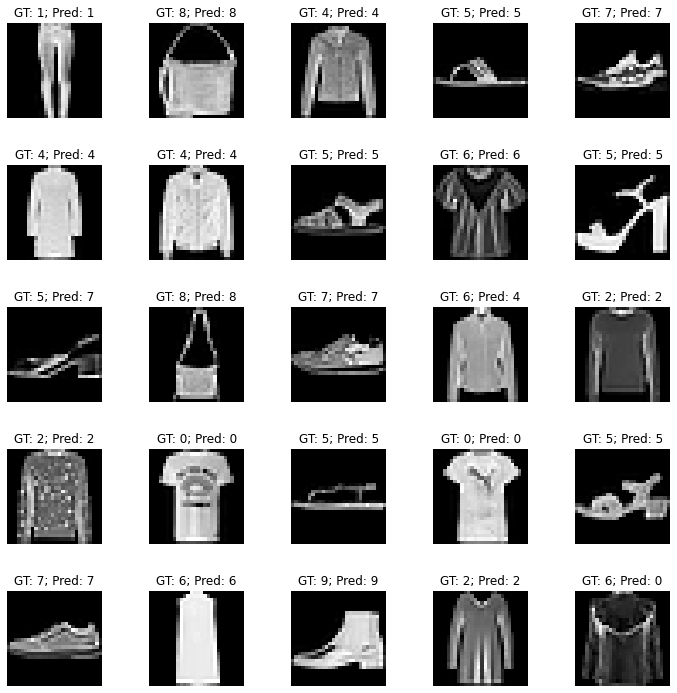

In [95]:
display_result(X_test, Y_test, predict_classes)

**END OF PROJECT**<br>
**Author:** Tang Jia Hui <br>
**Date**: 16th March 2022